In [70]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Import MNIST Dataset

In [71]:
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [72]:
flatten_layer = tf.keras.layers.Flatten()
x_train = flatten_layer(x_train)
x_test = flatten_layer(x_test)

x_train.shape, x_test.shape

(TensorShape([60000, 784]), TensorShape([10000, 784]))

### Build Autoencoder Model

In [73]:
# Network Parameters
encoding_layer = 32 # final encoding bottleneck features
n_input = 784 # MNIST data input (img shape: 28*28)

autoencoder_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(n_input,)),
    # Encoder Layer
    tf.keras.layers.Dense(encoding_layer, activation="relu"),
    # Decoder Layer
    tf.keras.layers.Dense(n_input, activation="sigmoid")
])

autoencoder_model.compile(optimizer="adam", loss="binary_crossentropy")

In [74]:
# Model Training
epochs = 20
batch_size = 64

autoencoder_model.fit(x_train, x_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
938/938 [==============================] - 5s 4ms/step - loss: 0.1905 - val_loss: 0.1320
Epoch 2/20
938/938 [==============================] - 3s 4ms/step - loss: 0.1183 - val_loss: 0.1061
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.1018 - val_loss: 0.0970
Epoch 4/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0964 - val_loss: 0.0940
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0949 - val_loss: 0.0930
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0944 - val_loss: 0.0927
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0940 - val_loss: 0.0928
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0939 - val_loss: 0.0926
Epoch 9/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0937 - val_loss: 0.0924
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0936 - val_loss: 0.0923

### Testing Autoencoder

In [75]:
img_pred = autoencoder_model.predict(x_test)
img_pred.shape

313/313 [==============================] - 1s 1ms/step


(10000, 784)

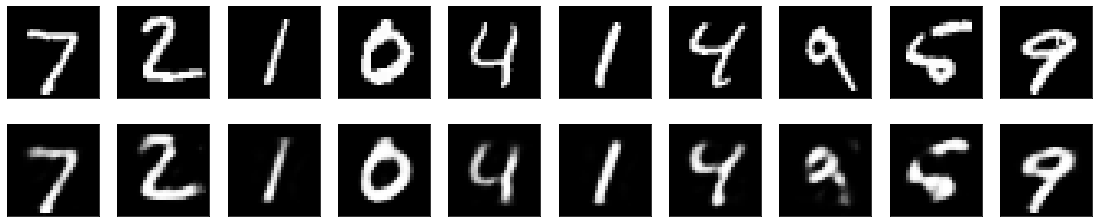

In [76]:
img_num = 10

plt.figure(figsize = (20,4), dpi = 70)

for i in range(img_num):
    ax = plt.subplot (2, img_num, i+1)
    plt.imshow(np.reshape(x_test[i], (28,28)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()

    ax = plt.subplot (2, img_num, i+1+img_num)
    plt.imshow(np.reshape(img_pred[i], (28,28)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()

plt.show()